## API del Clima

Datos de Temperatura historico NuevaYorkCity https://open-meteo.com/en/docs/air-quality-api

#### Importamos librerias necesarias para nuestro trabajo

In [16]:
import pandas as pd  # Importar la librería pandas para manipulación y análisis de datos
import matplotlib.pyplot as plt
import requests  # Importar el módulo requests para realizar solicitudes HTTP
import numpy as np

In [2]:
url = 'https://archive-api.open-meteo.com/v1/archive?latitude=40.7143&longitude=-74.006&start_date=1980-01-01&end_date=2024-03-15&hourly=temperature_2m&timezone=America%2FNew_York'
# Primero veamos el caso de una query general, sin definir parámetros.
response=requests.get(url)
response.content
#pasamos a formato json Inspeccionemos ahora el contenido de la respuesta:
json_data_T = response.json()
json_data_T

{'latitude': 40.738136,
 'longitude': -74.04254,
 'generationtime_ms': 7.27999210357666,
 'utc_offset_seconds': -14400,
 'timezone': 'America/New_York',
 'timezone_abbreviation': 'EDT',
 'elevation': 51.0,
 'hourly_units': {'time': 'iso8601', 'temperature_2m': '°C'},
 'hourly': {'time': ['1980-01-01T00:00',
   '1980-01-01T01:00',
   '1980-01-01T02:00',
   '1980-01-01T03:00',
   '1980-01-01T04:00',
   '1980-01-01T05:00',
   '1980-01-01T06:00',
   '1980-01-01T07:00',
   '1980-01-01T08:00',
   '1980-01-01T09:00',
   '1980-01-01T10:00',
   '1980-01-01T11:00',
   '1980-01-01T12:00',
   '1980-01-01T13:00',
   '1980-01-01T14:00',
   '1980-01-01T15:00',
   '1980-01-01T16:00',
   '1980-01-01T17:00',
   '1980-01-01T18:00',
   '1980-01-01T19:00',
   '1980-01-01T20:00',
   '1980-01-01T21:00',
   '1980-01-01T22:00',
   '1980-01-01T23:00',
   '1980-01-02T00:00',
   '1980-01-02T01:00',
   '1980-01-02T02:00',
   '1980-01-02T03:00',
   '1980-01-02T04:00',
   '1980-01-02T05:00',
   '1980-01-02T06:00',
 

La respuesta de la API es una lista de diccionarios. El primero de ellos contiene información general de los datos, y el segundo contiene los datos de interés relativos a países.

In [3]:
#Podemos llevar estos datos a un DataFrame de pandas
df_T=pd.DataFrame(json_data_T)#el primer elemento de la lista es el nombre de las columnas del DataFrame y el segundo es el 
                         #contenido de los datos en sí mismo (en formato lista de diccionarios) 
df_T#.head()

,latitude,longitude,generationtime_ms,utc_offset_seconds,timezone,timezone_abbreviation,elevation,hourly_units,hourly
time,40.738136,-74.04254,7.279992,-14400,America/New_York,EDT,51.0,iso8601,"[1980-01-01T00:00, 1980-01-01T01:00, 1980-01-0..."
temperature_2m,40.738136,-74.04254,7.279992,-14400,America/New_York,EDT,51.0,°C,"[-0.9, -2.3, -3.0, -3.6, -4.0, -4.2, -4.3, -4...."


### Realizamos un ETL

In [4]:
# Tomamos solo la columna 'hourly'
temp_df = pd.DataFrame(df_T['hourly'])
temp_df

,hourly
time,"[1980-01-01T00:00, 1980-01-01T01:00, 1980-01-0..."
temperature_2m,"[-0.9, -2.3, -3.0, -3.6, -4.0, -4.2, -4.3, -4...."


In [5]:
#hacemos la transpuesta de esta matriz o dataframe
temp_df_t = temp_df.transpose()
temp_df_t

,time,temperature_2m
hourly,"[1980-01-01T00:00, 1980-01-01T01:00, 1980-01-0...","[-0.9, -2.3, -3.0, -3.6, -4.0, -4.2, -4.3, -4...."


In [6]:
# creamos dos listas
time_df_T = temp_df_t['time'].explode('time')
temperature_df_T = temp_df_t['temperature_2m'].explode('temperature_2m')

In [7]:
# creamos una diccionario con las dos listas
diccionario_T = {'time':time_df_T,'temperature_C':temperature_df_T}

In [8]:
# Creamos un nuevo DF
df_temperatura = pd.DataFrame(diccionario_T)
df_temperatura

,time,temperature_C
0,1980-01-01T00:00,-0.9
1,1980-01-01T01:00,-2.3
2,1980-01-01T02:00,-3.0
3,1980-01-01T03:00,-3.6
4,1980-01-01T04:00,-4.0
...,...,...
387499,2024-03-15T19:00,14.3
387500,2024-03-15T20:00,12.5
387501,2024-03-15T21:00,10.1
387502,2024-03-15T22:00,9.2


In [9]:
fecha = df_temperatura['time'].str.split('T', expand=True)[0]
hora = df_temperatura['time'].str.split('T', expand=True)[1]
df_temperatura_NYC = pd.concat([fecha, hora, df_temperatura], axis=1)

# Print the new DataFrame
df_temperatura_NYC = df_temperatura_NYC.rename(columns={0: 'fecha', 1: 'hora'})
df_temperatura_NYC = df_temperatura_NYC[['fecha',	'hora',	'temperature_C']]
df_temperatura_NYC


,fecha,hora,temperature_C
0,1980-01-01,00:00,-0.9
1,1980-01-01,01:00,-2.3
2,1980-01-01,02:00,-3.0
3,1980-01-01,03:00,-3.6
4,1980-01-01,04:00,-4.0
...,...,...,...
387499,2024-03-15,19:00,14.3
387500,2024-03-15,20:00,12.5
387501,2024-03-15,21:00,10.1
387502,2024-03-15,22:00,9.2


In [10]:
# Visualizamos el tipo de dato de fecha
print(df_temperatura_NYC['fecha'].dtype)

object


In [11]:
df_temperatura_NYC['fecha'] = pd.to_datetime(df_temperatura_NYC['fecha'])

In [12]:
df_temperatura_NYC['año'] = df_temperatura_NYC['fecha'].dt.strftime('%Y')
df_temperatura_NYC['mes'] = df_temperatura_NYC['fecha'].dt.strftime('%m')
df_temperatura_NYC['dia'] = df_temperatura_NYC['fecha'].dt.strftime('%d')

In [13]:
df_temperatura_NYC = df_temperatura_NYC[['fecha', 'año', 'mes', 'dia', 'hora', 'temperature_C']]
df_temperatura_NYC

,fecha,año,mes,dia,hora,temperature_C
0,1980-01-01,1980,01,01,00:00,-0.9
1,1980-01-01,1980,01,01,01:00,-2.3
2,1980-01-01,1980,01,01,02:00,-3.0
3,1980-01-01,1980,01,01,03:00,-3.6
4,1980-01-01,1980,01,01,04:00,-4.0
...,...,...,...,...,...,...
387499,2024-03-15,2024,03,15,19:00,14.3
387500,2024-03-15,2024,03,15,20:00,12.5
387501,2024-03-15,2024,03,15,21:00,10.1
387502,2024-03-15,2024,03,15,22:00,9.2


In [14]:
df_temperatura_NYC.temperature_C.describe()

count     387504.0
unique       617.0
top           21.0
freq        1496.0
Name: temperature_C, dtype: float64

In [15]:
df_temperatura_NYC['temperature_C'].max()

38.5

Graficamos los datos de la temperatura

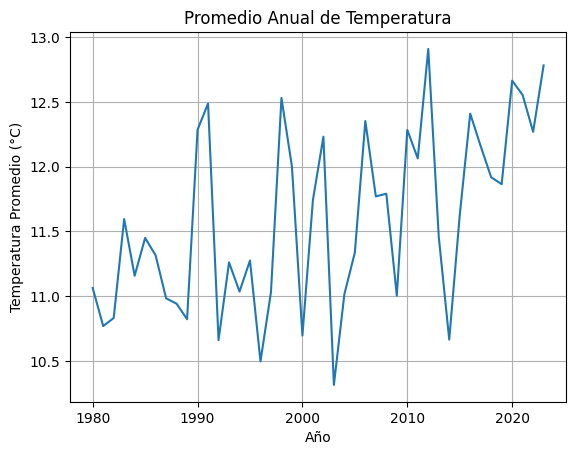

In [17]:
# Convert 'año' column to numeric, handling errors
df_temperatura_NYC['año'] = pd.to_numeric(df_temperatura_NYC['año'], errors='coerce')

# Remove rows with NaN values in 'año' column
df_new3 = df_temperatura_NYC.dropna(subset=['año'])

# Calculate the annual average temperature
annual_avg_temp = df_new3.groupby('año')['temperature_C'].mean()
annual_avg_temp = pd.DataFrame(annual_avg_temp)
annual_avg_temp.reset_index(inplace=True)
annual_avg_temp = annual_avg_temp[annual_avg_temp['año'] < 2024]
x = annual_avg_temp['año'].values
y = annual_avg_temp['temperature_C'].values



# Reset index to make 'año' a column again
#annual_avg_temp = annual_avg_temp.reset_index()

# Plot the data
plt.plot(x, y)
plt.xlabel('Año')
plt.ylabel('Temperatura Promedio (°C)')
plt.title('Promedio Anual de Temperatura')
plt.grid(True)
plt.show()

In [18]:
#exportar a csv pomedios anuales de temperatura
annual_avg_temp.to_parquet("../0-DataSets/3-DatosScrapingConETL/temperature_C_mean_1980_2023.parquet")

Guardamos la data de la grafica

In [20]:
df_temperatura_NYC_2023 = df_temperatura_NYC[df_temperatura_NYC['año'] >= 2023]
df_temperatura_NYC_2023

,fecha,año,mes,dia,hora,temperature_C
376944,2023-01-01,2023,01,01,00:00,10.6
376945,2023-01-01,2023,01,01,01:00,10.4
376946,2023-01-01,2023,01,01,02:00,10.3
376947,2023-01-01,2023,01,01,03:00,10.2
376948,2023-01-01,2023,01,01,04:00,9.6
...,...,...,...,...,...,...
387499,2024-03-15,2024,03,15,19:00,14.3
387500,2024-03-15,2024,03,15,20:00,12.5
387501,2024-03-15,2024,03,15,21:00,10.1
387502,2024-03-15,2024,03,15,22:00,9.2


guardamos la data de temperatura desde el años 2023 al 2024

In [21]:
#exportar a csv
df_temperatura_NYC_2023.to_parquet("../0-DataSets/3-DatosScrapingConETL/temperature_C_2023_2024.parquet")